In [0]:
import numpy as np

In [0]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Perceptron

The perceptron models a single neuron. 

* Input vector
* Weights and bias
* Activation function

![Perceptron](https://raw.githubusercontent.com/UCIDataScienceInitiative/LearningWithPython/master/figures/perceptron.png)

There are different activation functions. Most of them map the input to between 0 and 1, where 0 means the neuron is inactive and 1 means the neuron is excited.

![Activation](https://raw.githubusercontent.com/UCIDataScienceInitiative/LearningWithPython/master/figures/activation.png)

**Exercise 0**

In [0]:
def sigmoid_activation(x):
    """
    Sigmoid activation function.
    
    Args
        x: (float) input
    """
    return 1.0/(1.0+np.exp(-x))

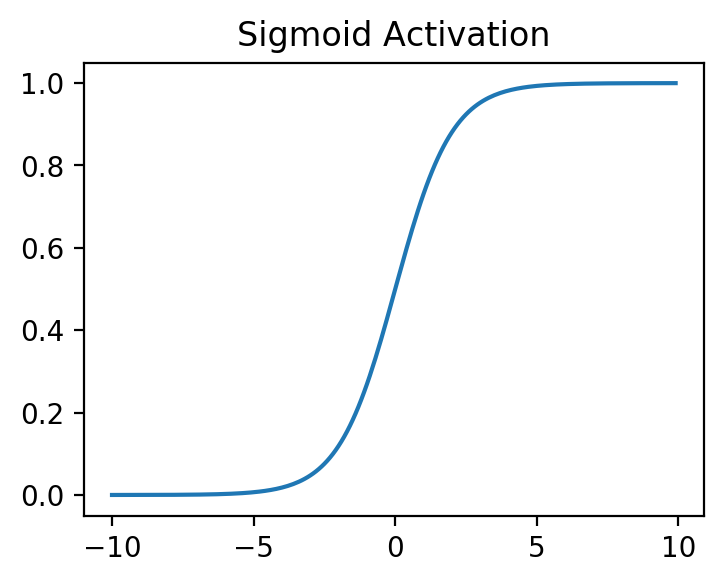

In [16]:
fig = plt.figure(figsize=(4, 3), dpi=200)
line = np.asarray(range(-100, 100)) / 10.0
activation = sigmoid_activation(line)
plt.plot(line, activation)
plt.title('Sigmoid Activation')
plt.show()

In [0]:
def neuron(input_vector, weight_vector, bias):
    """
    Calculate the output of a single neuron.
    
    Args
        input_vector: (2d numpy array) [1, n_dim] vector of inputs
        weight_vector: (2d numpy array) [n_dim, 1] vector of weights
        bias: (float) bias
    """
    return sigmoid_activation(np.dot(input_vector,weight_vector)+bias)

In [0]:
xx, yy = np.meshgrid(np.arange(-10, 10, 0.5), np.arange(-10, 10, 0.5))
points = np.c_[xx.ravel(), yy.ravel()]

In [0]:
random_weights = np.random.randn(2, 1)
random_bias = np.random.randn(1)
output = neuron(points, random_weights, random_bias)

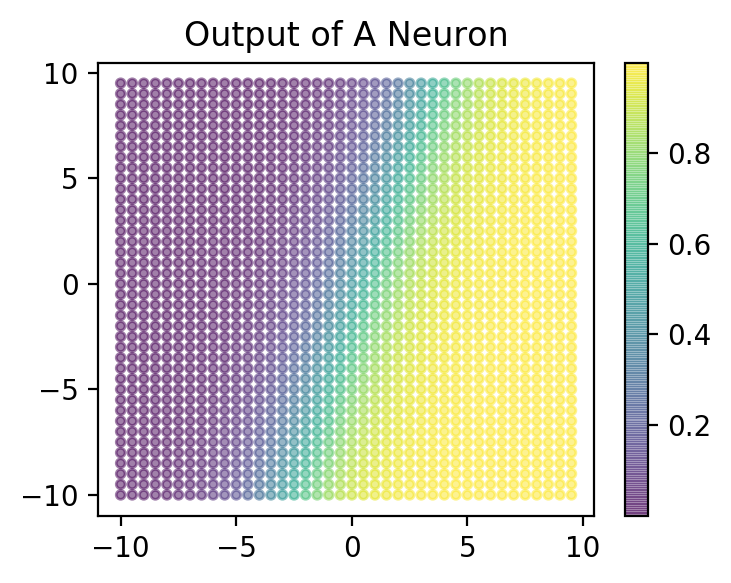

In [20]:
fig = plt.figure(figsize=(4, 3), dpi=200)
plt.scatter(points[:, 0], points[:, 1], c=output[:, 0], s=10, alpha=0.5)
plt.colorbar()
plt.title('Output of A Neuron')
plt.show()

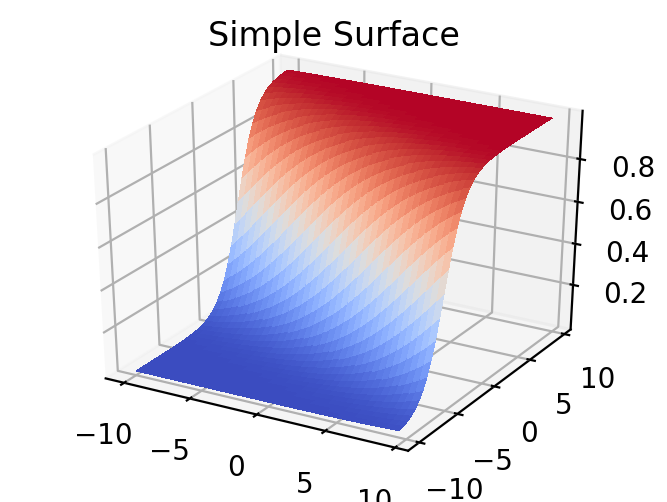

In [0]:
fig = plt.figure(figsize=(4, 3), dpi=200)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, output.reshape(xx.shape), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('Simple Surface')
plt.show()

## Feedforward neural network

With perceptron as a building block, a neural network has **multiple layers that have multiple neurons**. In the feedforward architecture, the connections are strictly from one layer to the next; there are no "loops." To obtain the neural network output, the input vector is passed through all the layers (forward propagation/pass).


<img src="https://raw.githubusercontent.com/UCIDataScienceInitiative/LearningWithPython/master/figures/neuralnet.png" width="40%">

**Exercise 1**

In [0]:
def layer(input_vector, weight_matrix, bias_vector):
    """
    Calculate the output of a layer of neurons. Implementation with matrix multiplication.
    
    Args
        input_vector: (2d numpy array) [1, n_dim] vector of inputs
        weight_matrix: (2d numpy array) [n_dim, n_neuron] matrix of weights
        bias_vector: (2d numpy array) [1, n_neuron] vector of biases
    """
    return sigmoid_activation(np.dot(input_vector,weight_matrix)+bias_vector)

**Exercise 2**

In [0]:
def forward_pass(input_vector, weights, biases):
    """
    Forward pass through multiple layers.
    
    Args
        input_vector: (2d numpy array) [1, n_dim] vector of inputs
        weights: (list) of [n_dim, n_neuron] weight matrices
        biases: (list) of [1, n_neuron] biases vectors
        
    Returns
        (2d numpy array) [1, n_neuron] vector of neural network outputs
    """
    n_layer = len(weights)
    current_vector = input_vector
    for i in range(n_layer):
        current_vector = layer(current_vector,weights[i],biases[i])
    return current_vector

In [0]:
input_dim = 2
hidden_dim1 = 100
hidden_dim2 = 20
output_dim = 1

W1 = np.random.randn(input_dim, hidden_dim1)
b1 = np.random.randn(1, hidden_dim1)
W2 = np.random.randn(hidden_dim1, hidden_dim2)
b2 = np.random.randn(1, hidden_dim2)
W3 = np.random.randn(hidden_dim2, output_dim)
b3 = np.random.randn(1, output_dim)

In [0]:
xx, yy = np.meshgrid(np.arange(-10, 10, 0.5), np.arange(-10, 10, 0.5))
points = np.c_[xx.ravel(), yy.ravel()]

In [0]:
output = forward_pass(points, [W1, W2, W3], [b1, b2, b3])

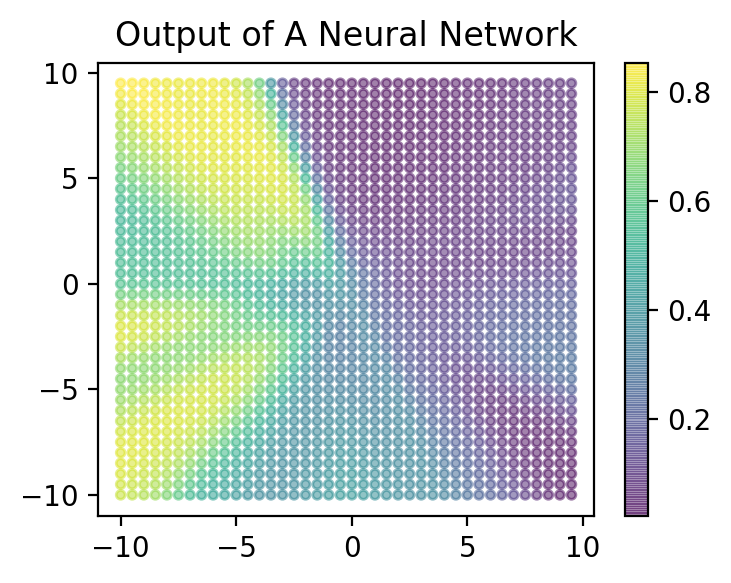

In [83]:
fig = plt.figure(figsize=(4, 3), dpi=200)
plt.scatter(points[:, 0], points[:, 1], c=output[:, 0], s=10, alpha=0.5)
plt.colorbar()
plt.title('Output of A Neural Network')
plt.show()

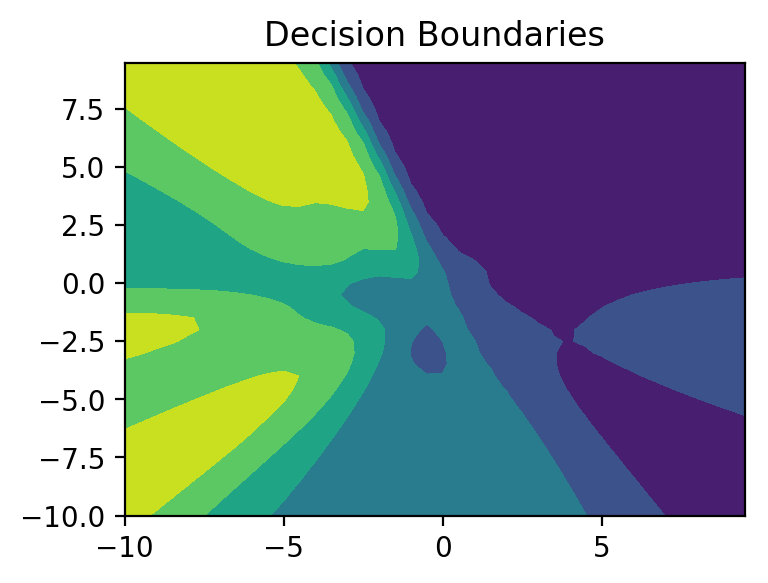

In [84]:
fig = plt.figure(figsize=(4, 3), dpi=200)
plt.contourf(xx, yy, output.reshape(xx.shape))
plt.title('Decision Boundaries')
plt.show()

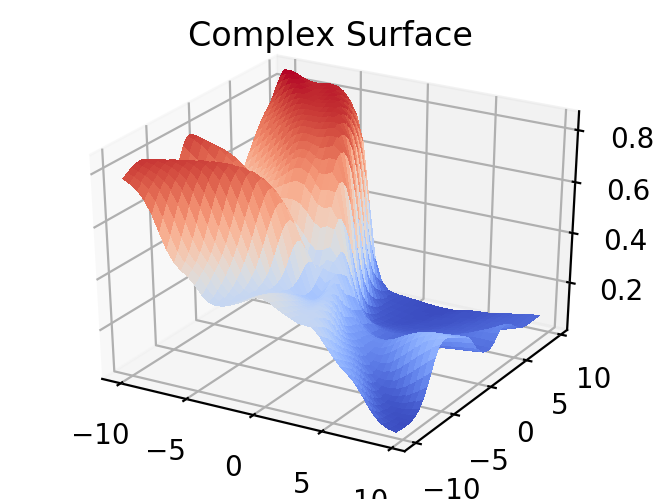

In [85]:
fig = plt.figure(figsize=(4, 3), dpi=200)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, output.reshape(xx.shape), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('Complex Surface')
plt.show()

It has been shown that neural networks are universal approximators.

http://neuralnetworksanddeeplearning.com/chap4.html

![Theorem](https://raw.githubusercontent.com/UCIDataScienceInitiative/LearningWithPython/master/figures/universal.png)

<img src="https://raw.githubusercontent.com/UCIDataScienceInitiative/LearningWithPython/master/figures/deeper.png" width="60%">